In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [12]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [4]:
class_names=['T-shirt/top',
            'Trousers',
            'pullover',
            'dress',
            'coat',
            'sandal',
            'shirt',
            'sneakers',
            'bag',
            'ankle boot']

In [13]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels.shape

(60000,)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
test_labels.shape

(10000,)

In [14]:
np.min(train_labels),np.max(train_labels)

(0, 9)

In [15]:
print('pixel value range',np.min(train_images),'to',np.max(train_images))

pixel value range 0 to 255


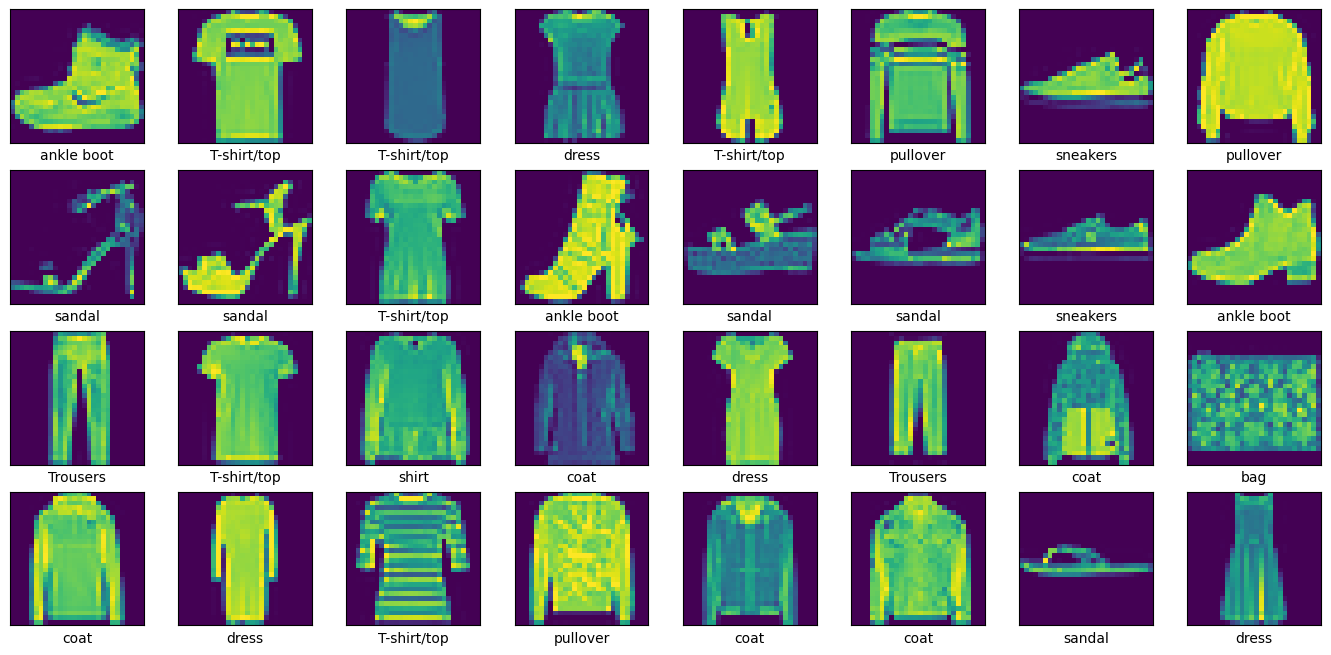

In [16]:
plt.figure(figsize=(17,8))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [18]:
train_images_normal=train_images/255.0
test_images_normal=test_images/255.0

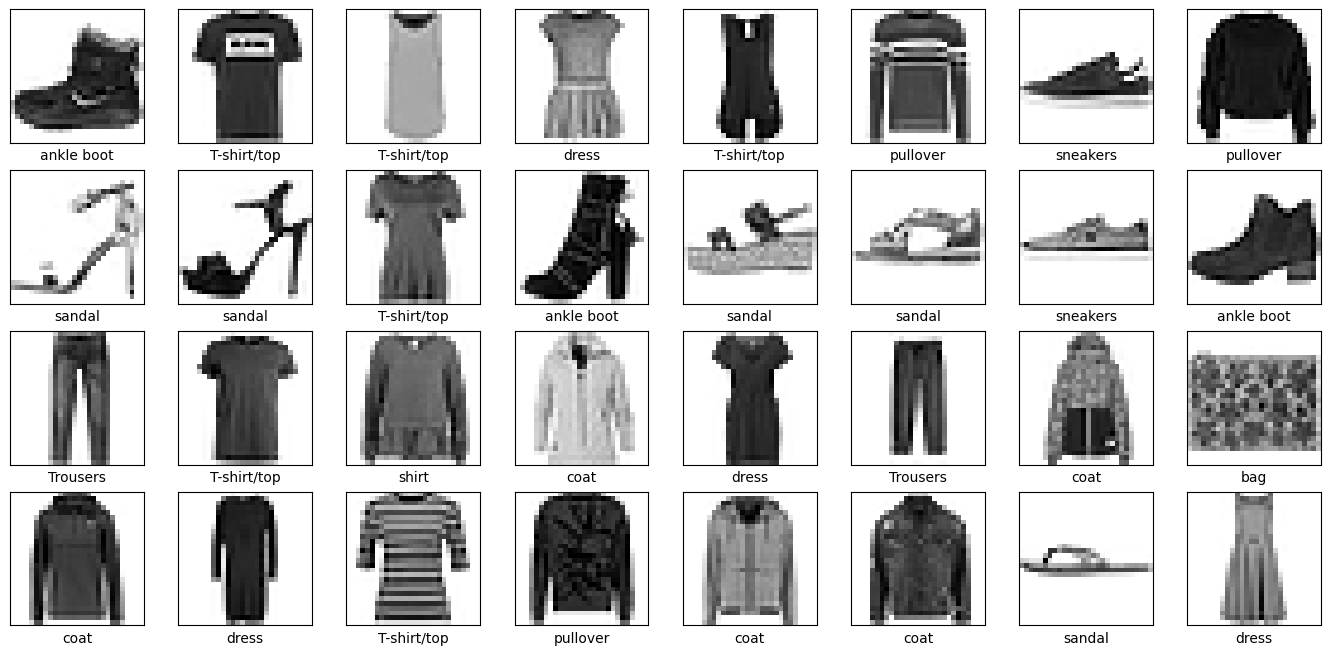

In [19]:
plt.figure(figsize=(17,8))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [21]:
from keras.models import Sequential
from keras.layers import Input,Flatten,Conv2D,Dense,MaxPooling2D

In [26]:
inputs=keras.Input(shape=(28,28))

In [27]:
inputs.shape

TensorShape([None, 28, 28])

In [28]:
inputs.dtype

tf.float32

In [29]:
x1=layers.Flatten()(inputs)
x2=layers.Dense(128,activation="relu")(x1)
outputs=layers.Dense(10,activation="softmax")(x2)


In [31]:
model=keras.Model(inputs=inputs,outputs=outputs,name="fashion_mnist_model")

In [33]:
model.summary()

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [58]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,CSVLogger

In [67]:
mc=ModelCheckpoint(r"C:\Users\range\Downloads\archive (18)\mdlx{epoch}.h5",monitor='accuracy',verbose=1,save_best_only=True,)

In [68]:
es=EarlyStopping(monitor='accuracy',min_delta=0.1,patience=3,verbose=1,start_from_epoch=3)

In [69]:
model.fit(train_images_normal,train_labels,epochs=25,callbacks=[es,mc])

Epoch 1/25
1874/1875 [============================>.] - ETA: 0s - loss: 0.0671 - accuracy: 0.9748
Epoch 1: accuracy improved from -inf to 0.97477, saving model to C:\Users\range\Downloads\archive (18)\mdlx1.h5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0672 - accuracy: 0.9748
Epoch 2/25
  10/1875 [..............................] - ETA: 10s - loss: 0.0538 - accuracy: 0.9812

C:\Users\range\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1871/1875 [============================>.] - ETA: 0s - loss: 0.0664 - accuracy: 0.9753
Epoch 2: accuracy improved from 0.97477 to 0.97538, saving model to C:\Users\range\Downloads\archive (18)\mdlx2.h5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0663 - accuracy: 0.9754
Epoch 3/25
1875/1875 [==============================] - ETA: 0s - loss: 0.0645 - accuracy: 0.9756
Epoch 3: accuracy improved from 0.97538 to 0.97558, saving model to C:\Users\range\Downloads\archive (18)\mdlx3.h5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0645 - accuracy: 0.9756
Epoch 4/25
1869/1875 [============================>.] - ETA: 0s - loss: 0.0655 - accuracy: 0.9762
Epoch 4: accuracy improved from 0.97558 to 0.97618, saving model to C:\Users\range\Downloads\archive (18)\mdlx4.h5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0654 - accuracy: 0.9762
Epoch 5/25
1866/1875 [============================>.] - ETA: 0s - loss: 0.0661 - accuracy: 0.9758
E

In [70]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)


313/313 - 0s - loss: 176.5306 - accuracy: 0.8638 - 476ms/epoch - 2ms/step


313/313 [==============================] - 0s 1ms/step


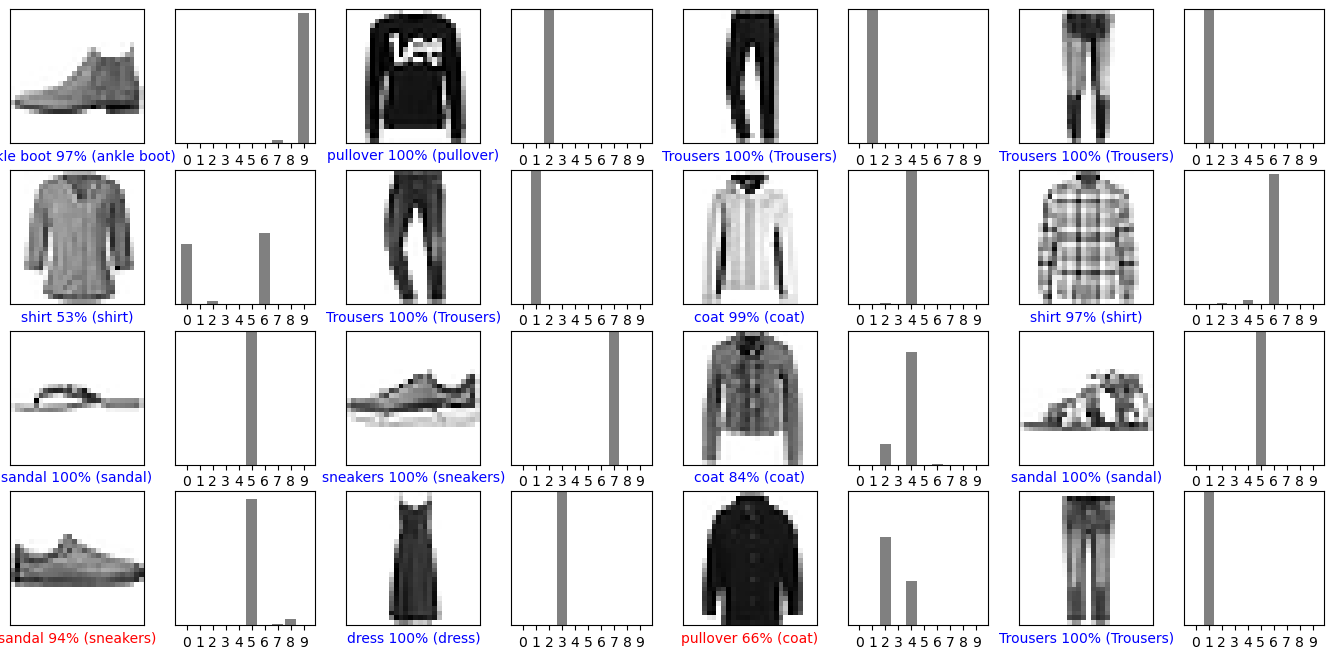

In [46]:
predictions=model.predict(test_images_normal)
plt.figure(figsize=(17,8))
for i in range(16):
    plt.subplot(4,8,2*i+1)
    plt.xticks([])
    plt.yticks([])
    if np.argmax(predictions[i])==test_labels[i]:
        color='blue'
    else:
        color='red'
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(predictions[i])],
                                        100*np.max(predictions[i]),
                                        class_names[test_labels[i]]),
                                        color=color)
    plt.subplot(4,8,2*i+2)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions[i],color="grey")
    plt.ylim([0,1])
    thisplot[np.argmax(predictions[i])].set_color=("red")
plt.show()
    
               

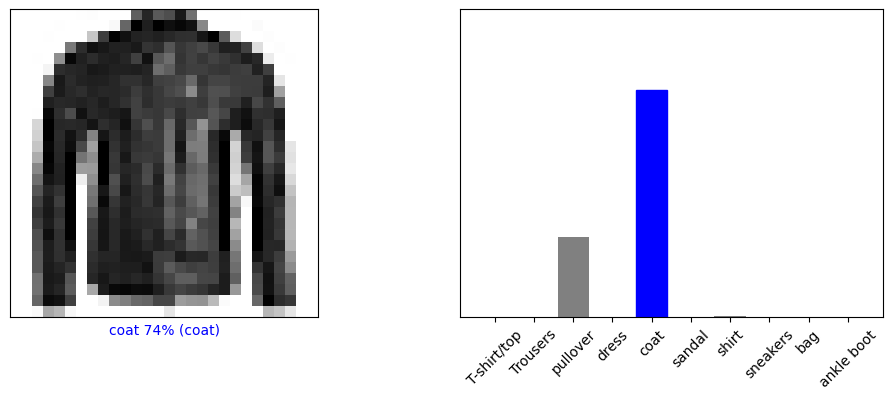

In [55]:
plt.figure(figsize=(12,4))
i=50
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
if np.argmax(predictions[i])==test_labels[i]:
    color='blue'
else:
    color='red'
plt.imshow(test_images[i],cmap=plt.cm.binary)
plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(predictions[i])],
                                    100*np.max(predictions[i]),
                                    class_names[test_labels[i]]),
                                    color=color)
plt.subplot(1,2,2)
plt.xticks(range(10),class_names,rotation=45)
plt.yticks([])
thisplot=plt.bar(range(10),predictions[i],color="grey")
plt.ylim([0,1])
thisplot[np.argmax(predictions[i])].color=("red")
thisplot[test_labels[i]].set_color("blue")
plt.show()      
        